In [154]:
import pandas as pd
import numpy as np
from PIL import Image
import random

In [155]:
img = Image.open('assignment k means pic.jpg')

In [156]:
w, h = img.size

In [157]:
rgb_values = []
for y in range(h):
    for x in range(w):
        pixelvalue = img.getpixel((x,y))
        rgb_values.append(pixelvalue)

In [158]:
df =pd.DataFrame(rgb_values, columns=['Red', 'Green','Blue'])

In [159]:
df.shape

(540000, 3)

In [160]:
df.head()

,Red,Green,Blue
0,99,144,177
1,97,142,175
2,95,140,171
3,92,137,168
4,90,135,164


In [161]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,6):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

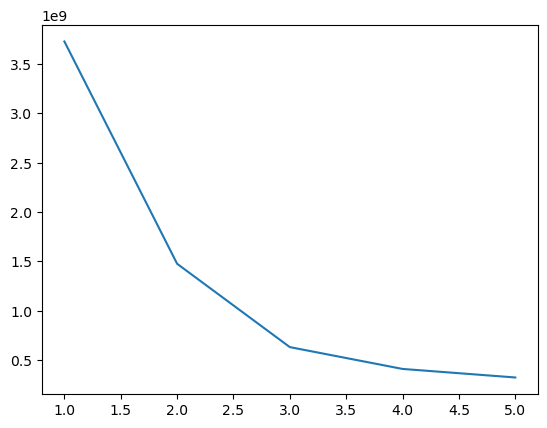

In [163]:
#PLotting WCSS with out sklearn code
import matplotlib.pyplot as plt
plt.plot(range(1,6), wcss)

In [169]:
X = df.values
wcss=[]
for k in range(1,5):
    random_index = random.sample(range(0, df.shape[0]), k)
    initial_cent = X[random_index]

    for m in range(100):
        
        # Assign Cluster
        assign_cluster =[]
        for row in X:
            distance=[]
            for centroid in initial_cent:
                distance.append(np.sqrt(np.dot(row-centroid, row-centroid)))
            index = distance.index(min(distance))
            assign_cluster.append(index)
        assign_cluster = np.array(assign_cluster)           
        
        # New centroids
        old_cent = initial_cent
        uni_cluster_no = np.unique(assign_cluster)
        cen_new =[]
        for cluster_no in uni_cluster_no:
            cen_new.append(X[assign_cluster == cluster_no].mean(axis=0))

        initial_cent = np.array(cen_new)
        
        # Check convergence
        if(old_cent == initial_cent).all():
            wcss1 = 0
            for i in uni_cluster_no:
                X1=X[assign_cluster==i]
                for j in X1:
                    wcss1 = wcss1 + np.dot((j - initial_cent[i]),(j - initial_cent[i]))
            wcss.append(wcss1)
            break

    print('Total iteration run:',m+1)
    print('Final Centroids are:',cen_new)
print(wcss)

Total iteration run: 2
Final Centroids are: [array([ 91.36714074, 121.22322593, 102.45025556])]
Total iteration run: 17
Final Centroids are: [array([240.01088295, 207.05198508,  36.48902425]), array([ 73.0416489 , 110.64185733, 110.58226292])]
Total iteration run: 21
Final Centroids are: [array([240.44551984, 207.28641774,  36.04195745]), array([53.77661094, 80.67053168, 76.95923514]), array([ 87.23853874, 132.60234313, 135.12367983])]
Total iteration run: 42
Final Centroids are: [array([ 96.37410984, 144.09828235, 151.60760917]), array([240.53625062, 207.34284597,  35.92304291]), array([46.8126634 , 67.27429739, 64.83553922]), array([ 72.16177752, 112.52874309, 108.41991137])]
[3726502401.8107123, 1475483975.7882957, 631424263.6930985, 410459042.061715]


In [170]:
wcss

[3726502401.8107123, 1475483975.7882957, 631424263.6930985, 410459042.061715]

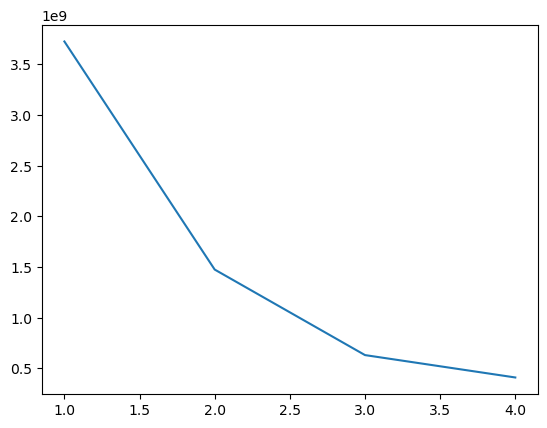

In [172]:
#PLotting WCSS with out own written code 
plt.plot(range(1,5), wcss)